In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [6]:
df=pd.concat([train_df,test_df])
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


## Filling null values

In [8]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [9]:
df['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [10]:
df['education'].fillna("unknown",inplace=True)

In [11]:
df['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [12]:
#The 'previous_year_rating' represent the score of employees based on the previous year 
#We have one more column in the data which represent the duration of employees ('length_of_service')

In [13]:
df[df.previous_year_rating.isnull()]['length_of_service'].describe()

count    5936.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: length_of_service, dtype: float64

In [14]:
#'length_of_service' is 1 for all Nan values in 'previous_year_rating', this is beacuse they are fresheres in the company

In [15]:
df['previous_year_rating'].fillna(0,inplace=True)

In [16]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

## EDA & New features

In [17]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

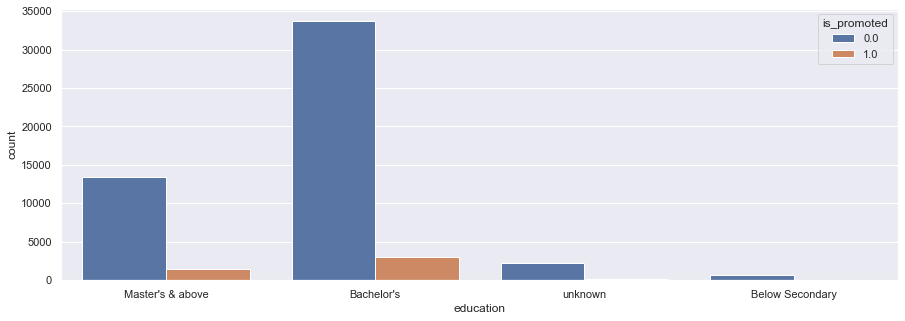

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='education',hue='is_promoted',data=df)
plt.show()

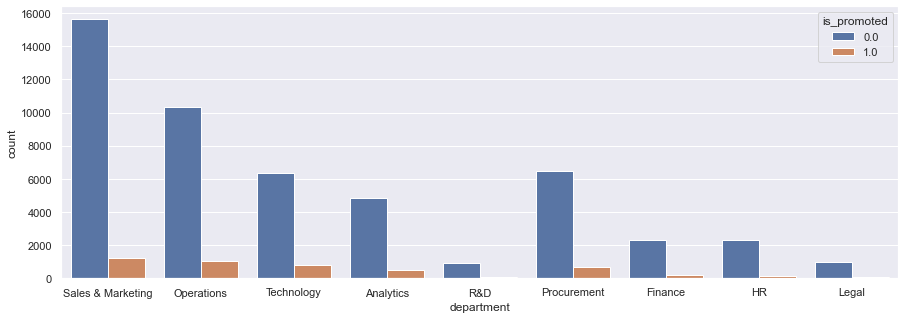

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='department',hue='is_promoted',data=df)
plt.show()

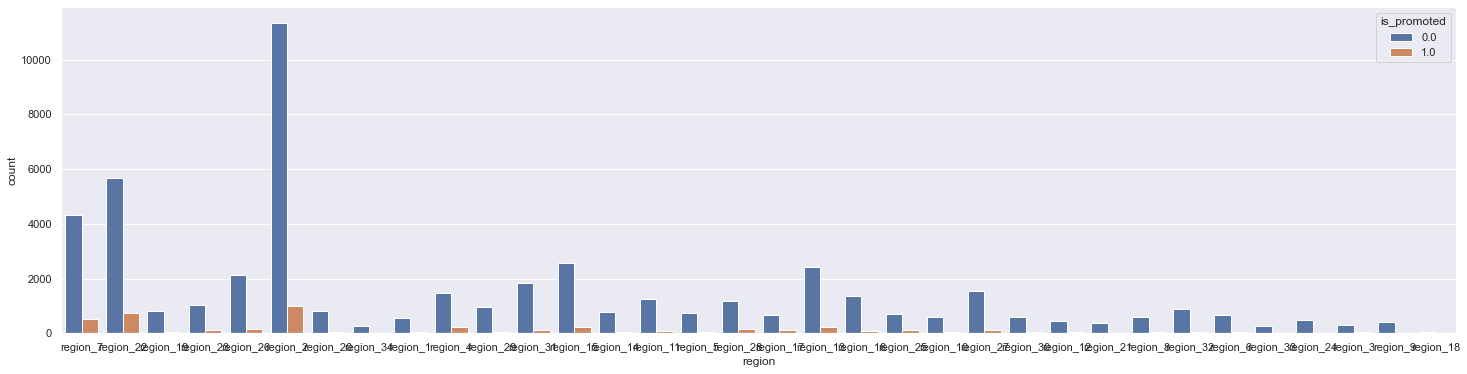

In [20]:
plt.figure(figsize=(25,6))
sns.countplot(x='region',hue='is_promoted',data=df)
plt.show()

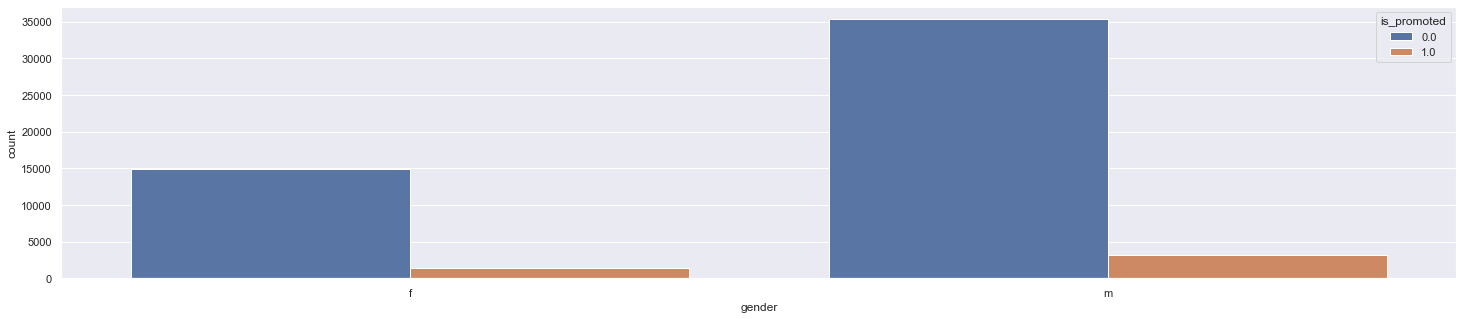

In [21]:
plt.figure(figsize=(25,5))
sns.countplot(x='gender',hue='is_promoted',data=df)
plt.show()

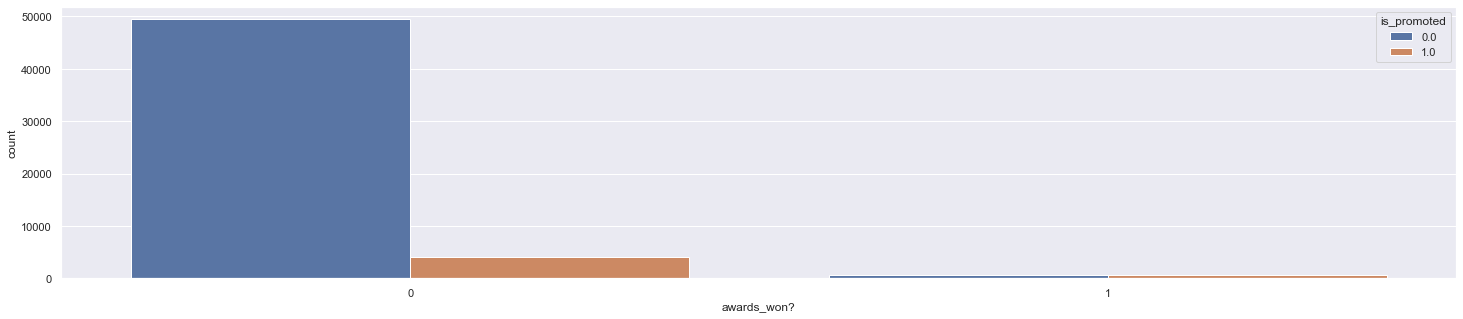

In [22]:
plt.figure(figsize=(25,5))
sns.countplot(x='awards_won?',hue='is_promoted',data=df)
plt.show()

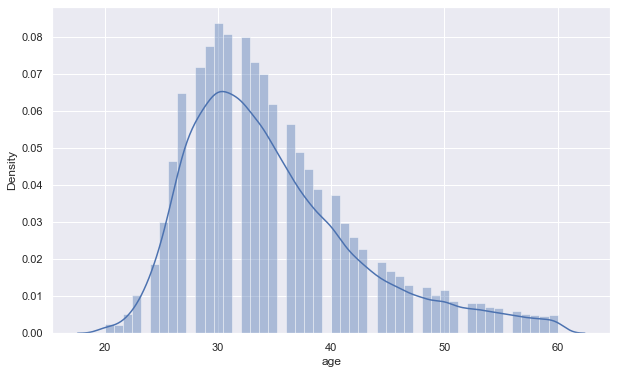

In [23]:
#age
plt.figure(figsize = (10,6))
sns.distplot(df['age'])
plt.show()

In [24]:
#convert ages to groups of age ranges

pd.cut( x=df['age'], bins=[19, 29, 39, 49,61], labels=['20', '30', '40','60'] ).value_counts()

30    40043
20    20686
40    12743
60     4826
Name: age, dtype: int64

In [25]:
df['age'] = pd.cut( x=df['age'], bins=[19, 29, 39, 49,61], labels=['20', '30', '40','60'] )

In [26]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,30,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,40,3.0,2,0,0,73,0.0


In [27]:
df['age'].value_counts()

30    40043
20    20686
40    12743
60     4826
Name: age, dtype: int64

<AxesSubplot:>

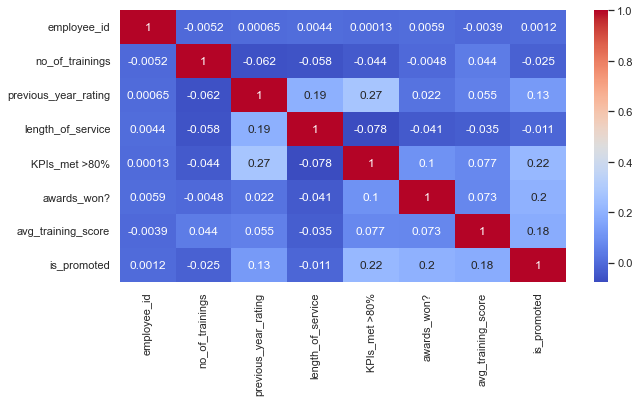

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')

In [29]:
df.corr()['no_of_trainings']['is_promoted']

-0.024895917682412522

In [30]:
#There is negative relation between 'no_of_training' and 'is_prmoted'
df[['no_of_trainings','avg_training_score']].describe()

,no_of_trainings,avg_training_score
count,78298.000000,78298.000000
mean,1.253378,63.349664
std,0.606766,13.383664
min,1.000000,39.000000
25%,1.000000,51.000000
50%,1.000000,60.000000
75%,1.000000,76.000000
max,10.000000,99.000000


In [31]:
df['no_of_trainings'].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: no_of_trainings, dtype: int64

#More no of training less chances of promototion 
#avg_training_score/no_of_trainings == (sum_of_training_score)/(no_of_training)**2  
##Thus creating a polynomial feature

In [32]:
df['score'] = df['avg_training_score']/df['no_of_trainings']

In [33]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30,5.0,8,1,0,49,0.0,49.000000
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,60.000000
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30,3.0,7,0,0,50,0.0,50.000000
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,30,1.0,10,0,0,50,0.0,25.000000
4,48945,Technology,region_26,Bachelor's,m,other,1,40,3.0,2,0,0,73,0.0,73.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,20,3.0,1,0,0,61,NaN,61.000000
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,30,3.0,7,0,0,74,NaN,74.000000
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,20,4.0,4,0,0,50,NaN,50.000000
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,20,0.0,1,0,0,70,NaN,23.333333


## Encoding

In [34]:
from scipy import stats as ss

In [35]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [36]:
cramers_v(df['region'],df['is_promoted'])

0.08986842586887933

In [37]:
ss.chi2_contingency(pd.crosstab(df['region'],df['is_promoted']))

(475.6402377579206,
 7.275378205784026e-80,
 33,
 array([[5.58046271e+02, 5.19537294e+01],
        [5.92809809e+02, 5.51901912e+01],
        [1.20300139e+03, 1.11998613e+02],
        [4.57414976e+02, 4.25850241e+01],
        [2.42246971e+03, 2.25530288e+02],
        [7.56564370e+02, 7.04356298e+01],
        [2.56884250e+03, 2.39157495e+02],
        [1.34022588e+03, 1.24774121e+02],
        [7.28204642e+02, 6.77953583e+01],
        [2.83597285e+01, 2.64027149e+00],
        [7.99561378e+02, 7.44386221e+01],
        [1.12917461e+04, 1.05125390e+03],
        [7.77605459e+02, 7.23945409e+01],
        [3.75995110e+02, 3.50048898e+01],
        [5.88052693e+03, 5.47473070e+02],
        [1.07492519e+03, 1.00074807e+02],
        [4.64733616e+02, 4.32663845e+01],
        [7.49245731e+02, 6.97542694e+01],
        [2.06751569e+03, 1.92484309e+02],
        [1.51770289e+03, 1.41297110e+02],
        [1.20574588e+03, 1.12254123e+02],
        [9.09340972e+02, 8.46590279e+01],
        [3.16531163e+02, 2.

In [38]:
p_value = 7.275378205784026e-80
'{:f}'.format(p_value)
#Since the p_value is less than 0.05 so we failed to reject the null hypothesis that these variable are not associated

'0.000000'

In [39]:

#education
print('{:f}'.format(ss.chi2_contingency(pd.crosstab(df['education'],df['is_promoted']))[1]))

0.000000


In [40]:
#department
print('{:f}'.format(ss.chi2_contingency(pd.crosstab(df['department'],df['is_promoted']))[1]))

0.000000


In [41]:
df['gender']=df['gender'].apply(lambda x: 0 if x =='f' else 1)

In [42]:
df=pd.get_dummies(df,columns=["region", "age","department", "education", "recruitment_channel"],drop_first=True)


In [43]:
df.astype( 'float64').dtypes

employee_id                     float64
gender                          float64
no_of_trainings                 float64
previous_year_rating            float64
length_of_service               float64
KPIs_met >80%                   float64
awards_won?                     float64
avg_training_score              float64
is_promoted                     float64
score                           float64
region_region_10                float64
region_region_11                float64
region_region_12                float64
region_region_13                float64
region_region_14                float64
region_region_15                float64
region_region_16                float64
region_region_17                float64
region_region_18                float64
region_region_19                float64
region_region_2                 float64
region_region_20                float64
region_region_21                float64
region_region_22                float64
region_region_23                float64


In [44]:
df.head(5)

,employee_id,gender,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,5.0,8,1,0,49,0.0,49.0,...,0,0,0,1,0,0,1,0,0,1
1,65141,1,1,5.0,4,0,0,60,0.0,60.0,...,1,0,0,0,0,0,0,0,0,0
2,7513,1,1,3.0,7,0,0,50,0.0,50.0,...,0,0,0,1,0,0,0,0,0,1
3,2542,1,2,1.0,10,0,0,50,0.0,25.0,...,0,0,0,1,0,0,0,0,0,0
4,48945,1,1,3.0,2,0,0,73,0.0,73.0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
train_new=df[df['is_promoted'].notna()]
test_new=df[df['is_promoted'].isna()]
test_new=test_new.drop(['is_promoted','employee_id'],axis=1)

In [46]:
train_new.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [47]:
train_new['is_promoted']=train_new['is_promoted'].astype( 'int64')

In [48]:
x = train_new.drop(['is_promoted','employee_id'],axis=1)
y = train_new['is_promoted']

In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [50]:
train_new.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [51]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_sc=pd.DataFrame(scaler.fit_transform(x))

In [52]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
test_scaler=pd.DataFrame(scaler.fit_transform(test_new))

In [53]:
x_sc

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.0,0.0,1.0,0.75,1.0,0.0,-0.44,-0.347826,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,-0.25,0.0,0.0,0.00,0.130435,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.50,0.0,0.0,-0.40,-0.304348,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,-1.0,1.25,0.0,0.0,-0.40,-1.391304,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.75,0.0,0.0,0.52,0.695652,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.0,0.0,0.0,3.00,0.0,0.0,0.72,0.913043,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
54804,-1.0,0.0,-0.5,0.25,0.0,0.0,-0.16,-0.043478,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
54805,0.0,0.0,1.0,-0.50,1.0,0.0,0.76,0.956522,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54806,0.0,0.0,-1.0,-0.75,0.0,0.0,-0.60,-0.521739,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [54]:
# Dimension Reduction - Pricipal component analysis
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x_sc)
test_pca =pca.fit_transform(test_scaler)
print(x.shape)
print(x_pca.shape)
print(test_new.shape)
print(test_pca.shape)

# we have 95% variance of the component parameter
# 8 columns we need to have 95% varaince 

(54808, 57)
(54808, 31)
(23490, 57)
(23490, 32)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, train_size=0.8, random_state=0)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((43846, 57), (43846,), (10962, 57), (10962,))

## 1.LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression 
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [58]:
print("train acc : %.3f" %f1_score(y_train, logit_model.predict(x_train)),"\n")
print("test acc : %.3f" %f1_score(y_test, logit_model.predict(x_test)))

train acc : 0.372 

test acc : 0.370


## 2. Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(max_depth=13)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=13)

In [60]:
print("train acc : %.3f" %f1_score(y_train, classifier.predict(x_train)),"\n")
print("test acc : %.3f" %f1_score(y_test, classifier.predict(x_test)))

train acc : 0.570 

test acc : 0.505


# 3. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
print("train acc : %.3f" %f1_score(y_train, rf.predict(x_train)),"\n")
print("test acc : %.3f" %f1_score(y_test, rf.predict(x_test)))

train acc : 0.990 

test acc : 0.480


## 4. Light GBM

In [63]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,roc_auc_score

In [64]:
classifier = LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 400,
                                             boosting_type = 'dart',
                                             learning_rate=0.19, 
                                             n_estimators=256,
                                             max_depth=4,
                                             scale_pos_weight=2.3)
classifier.fit(x_train,y_train)

LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.19,
               max_bin=60, max_depth=4, n_estimators=256, num_leaves=400,
               objective='binary', scale_pos_weight=2.3, subsample_freq=2,
               verbosity=-1)

In [65]:
print("train f1_score : %.4f" %f1_score(y_train, classifier.predict(x_train)),"\n")
print("test f1_score : %.4f" %f1_score(y_test, classifier.predict(x_test)))
# 0.49405772 ,0.4922547332185,0.49466192170818507.

train f1_score : 0.5367 

test f1_score : 0.5329


# 5. XGBoost Classifier

In [66]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
print("train f1_score : %.4f" %f1_score(y_train, classifier.predict(x_train)),"\n")
print("test f1_score : %.4f" %f1_score(y_test, classifier.predict(x_test)))
# 0.49405772 ,0.4922547332185,0.49466192170818507.

train f1_score : 0.5715 

test f1_score : 0.5258


## 6 hypertunning---Random Forest Classifier

In [68]:
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [69]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3,scoring='f1',verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [78]:
print("train f1_score : %.4f" %f1_score(y_train, rf_random.predict(x_train)),"\n")
print("test f1_score : %.4f" %f1_score(y_test, rf_random.predict(x_test)))
# 0.49405772 ,0.4922547332185,0.49466192170818507.

train f1_score : 0.7409 

test f1_score : 0.4948


In [79]:
rf_random.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=1),
 'n_iter': 20,
 'n_jobs': -1,
 'param_distributions': {'n_estimators': [200,
   400,
   600,
   800,
   1000,
   1200,
   1400,
   1600,
   1800,
   2000],
  'max_features': ['auto', 'sqrt'],
  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
  'min_samples_split': [2, 5, 10, 15],
  'min_sam

## VotingClassifier

In [71]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

In [72]:
# Create a Dictionary (Key->Value Pairs) Model-> Model Functions with Hyper-Parameters :

Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=494, 
                                           max_depth=5, 
                                           subsample = 0.70, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
                            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, 
                                                 n_estimators=494, 
                                                 subsample=0.085, 
                                                 max_depth=5, 
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.18, 
                                             n_estimators=494,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

In [73]:
voting_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[5,5,52])

#voting_model.fit(x_train,y_train) 

In [74]:
voting_model.fit(x_sc,y)

0:	learn: 0.5752478	total: 210ms	remaining: 1m 43s
1:	learn: 0.4977890	total: 280ms	remaining: 1m 8s
2:	learn: 0.4398298	total: 345ms	remaining: 56.5s
3:	learn: 0.4172843	total: 410ms	remaining: 50.3s
4:	learn: 0.3912753	total: 495ms	remaining: 48.4s
5:	learn: 0.3812612	total: 575ms	remaining: 46.7s
6:	learn: 0.3737956	total: 644ms	remaining: 44.8s
7:	learn: 0.3620727	total: 726ms	remaining: 44.1s
8:	learn: 0.3401037	total: 812ms	remaining: 43.8s
9:	learn: 0.3346060	total: 886ms	remaining: 42.9s
10:	learn: 0.3312350	total: 958ms	remaining: 42.1s
11:	learn: 0.3243485	total: 1.02s	remaining: 41.1s
12:	learn: 0.3185283	total: 1.07s	remaining: 39.7s
13:	learn: 0.3127595	total: 1.13s	remaining: 38.7s
14:	learn: 0.3050052	total: 1.19s	remaining: 37.9s
15:	learn: 0.3041834	total: 1.24s	remaining: 37.1s
16:	learn: 0.3010300	total: 1.29s	remaining: 36.3s
17:	learn: 0.2998016	total: 1.35s	remaining: 35.7s
18:	learn: 0.2985781	total: 1.42s	remaining: 35.6s
19:	learn: 0.2941204	total: 1.48s	remain

166:	learn: 0.2463048	total: 7.96s	remaining: 15.6s
167:	learn: 0.2462741	total: 8s	remaining: 15.5s
168:	learn: 0.2461958	total: 8.04s	remaining: 15.5s
169:	learn: 0.2460882	total: 8.07s	remaining: 15.4s
170:	learn: 0.2460703	total: 8.11s	remaining: 15.3s
171:	learn: 0.2459293	total: 8.14s	remaining: 15.2s
172:	learn: 0.2458722	total: 8.18s	remaining: 15.2s
173:	learn: 0.2457967	total: 8.22s	remaining: 15.1s
174:	learn: 0.2457082	total: 8.25s	remaining: 15s
175:	learn: 0.2456256	total: 8.28s	remaining: 15s
176:	learn: 0.2455308	total: 8.32s	remaining: 14.9s
177:	learn: 0.2453412	total: 8.35s	remaining: 14.8s
178:	learn: 0.2453010	total: 8.38s	remaining: 14.7s
179:	learn: 0.2452402	total: 8.41s	remaining: 14.7s
180:	learn: 0.2451429	total: 8.45s	remaining: 14.6s
181:	learn: 0.2450521	total: 8.48s	remaining: 14.5s
182:	learn: 0.2450045	total: 8.51s	remaining: 14.5s
183:	learn: 0.2449115	total: 8.55s	remaining: 14.4s
184:	learn: 0.2448714	total: 8.58s	remaining: 14.3s
185:	learn: 0.24480

329:	learn: 0.2342907	total: 16s	remaining: 7.93s
330:	learn: 0.2342586	total: 16s	remaining: 7.88s
331:	learn: 0.2341958	total: 16s	remaining: 7.83s
332:	learn: 0.2341898	total: 16.1s	remaining: 7.77s
333:	learn: 0.2341191	total: 16.1s	remaining: 7.72s
334:	learn: 0.2340765	total: 16.2s	remaining: 7.67s
335:	learn: 0.2340582	total: 16.2s	remaining: 7.61s
336:	learn: 0.2339901	total: 16.2s	remaining: 7.56s
337:	learn: 0.2338964	total: 16.3s	remaining: 7.5s
338:	learn: 0.2338637	total: 16.3s	remaining: 7.45s
339:	learn: 0.2338028	total: 16.3s	remaining: 7.39s
340:	learn: 0.2337542	total: 16.4s	remaining: 7.34s
341:	learn: 0.2336475	total: 16.4s	remaining: 7.29s
342:	learn: 0.2336191	total: 16.4s	remaining: 7.23s
343:	learn: 0.2335761	total: 16.5s	remaining: 7.18s
344:	learn: 0.2334996	total: 16.5s	remaining: 7.12s
345:	learn: 0.2334753	total: 16.5s	remaining: 7.07s
346:	learn: 0.2334223	total: 16.6s	remaining: 7.01s
347:	learn: 0.2333699	total: 16.6s	remaining: 6.96s
348:	learn: 0.23328

491:	learn: 0.2248902	total: 23.6s	remaining: 96ms
492:	learn: 0.2248340	total: 23.7s	remaining: 48ms
493:	learn: 0.2247867	total: 23.7s	remaining: 0us


VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_...
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('CatBoost_Best',
                              <catboost.core.CatBoostClassifier object at 0x0000023E03494340>),
                             ('LightGBM_Best',
                              LGBMClassifier(boosting_type='dart',
                                             importance_type='gain',
                                             learning_rate=0.18, max_bin=75,
                                             max_depth=5, n_estimators=594,
                                             num_leaves=300, objective='binary',
                                             scale_pos_weight=2.3,
                                             subsample_freq=2, verbosity=-1))],
                 voting='soft', weights=[5, 5, 5.2])

In [75]:
print(f1_score(y_test,voting_model.predict(x_test)))
print(f1_score(y_train,voting_model.predict(x_train)))
#0.5252854812398042,0.5281173594132029.,0.5281173594132029.,0.525974025974026

0.6316507503410642
0.6279300099042587


In [76]:
print(confusion_matrix(y_train,voting_model.predict(x_train)),"\n")
print(confusion_matrix(y_test,voting_model.predict(x_test)))

[[39690   409]
 [ 1845  1902]] 

[[9959   82]
 [ 458  463]]


In [77]:
# append the output into test dataset
sub=pd.DataFrame({
        "employee_id": test_df["employee_id"],
        "is_promoted": voting_model.predict(test_scaler) })
sub.to_csv("frame_2.csv",index = False)